In [7]:
import numpy as np
from scipy.special import factorial, gamma
import matplotlib.pyplot as plt

**1. Tossing (un)fair coins**

(1)

Plot of the percentage error of the multiplicity obtained using Striling's approximation:


Text(0, 0.5, 'percentage error (%)')

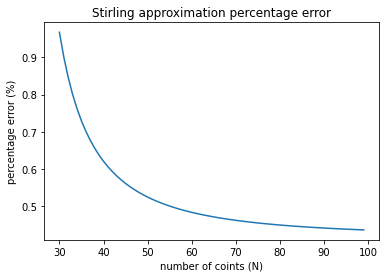

In [8]:
#---Constants used
pi = np.pi

n = 20          #no. of heads
N_start = 30    #starting number of coints
N_end = 100     #ending number of coins

def exact_multiplicity(N_start,N_end,n):
    n_array = np.ones(N_end-N_start)*n
    N_array = np.linspace(N_start,N_end, N_end-N_start)
    multiplicity = factorial(N_array)/(factorial(n_array)*factorial(N_array-n_array))
    return multiplicity

def stirling_multiplicity(N_start, N_end,n):
    n_array = np.ones(N_end-N_start)*n
    N_array = np.linspace(N_start,N_end, N_end-N_start)
    root = np.sqrt(np.divide(N_array,np.multiply(n_array,(N_array-n_array))))
    float_power = np.divide(np.float_power(N_array,N_array),np.multiply(np.float_power(n_array,n_array),np.float_power(N_array-n_array,N_array-n_array)))
    multiplicity = 1/np.sqrt(2*pi)*np.multiply(root,float_power)
    return multiplicity


exact = exact_multiplicity(N_start, N_end, n)
stirling = stirling_multiplicity(N_start, N_end, n)

error = np.divide(stirling-exact,stirling)*100

answer1_1 = error

index = np.where(error>0)[0]+30
plt.subplot(111)
plt.plot(index, error)
plt.title('Stirling approximation percentage error')
plt.xlabel('number of coints (N)')
plt.ylabel('percentage error (%)')

(2)

From which number of coins does the error become less that 0.5%?

In [9]:
answer1_2a = np.where(error<0.5)[0][0]+1
answer1_2b = len(np.where(error<0.5)[0])

print("From coin number "+str(answer1_2a)+" the error of Stirling's approximation is less than 0.5%.")

From coin number 27 the error of Stirling's approximation is less than 0.5%.


How many number of coins satisfy the 0.5% criterion?

In [10]:
print("There are "+str(answer1_2b)+" coins above which the error satisfies the 0.5% criterion.")

There are 44 coins above which the error satisfies the 0.5% criterion.


(3)

Formula for the probability of having n heads out of N unfair coins:

$f(N, n, p) = \frac{N!}{n!(N-n)!}p^n(1-p)^{N-n}$

Plot of the probabilityies against the number of heads, for fair and unfair coins R = 1.3 :

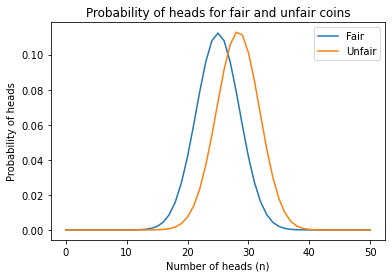

In [11]:
def multiplicity_with_probability(n_start,n_end,N):
    N_array = np.ones(N+1)*N
    n_array = np.linspace(n_start,n_end,N+1)
    multiplicity = factorial(N_array)/(factorial(n_array)*factorial(N_array-n_array))
    return multiplicity

def probability(N, n, p):
    bin_coef = multiplicity_with_probability(0, 50, 50)
    probability = bin_coef*(p**n)*(1-p)**(N-n)
    return probability

p_fair = 0.5
p_unfair = 1.3/2.3     # Probability for obtaining heads is 1.3 times the probability for obtaining tails
N = 50
n = np.linspace(0,50,N+1)

fair = probability(N, n, p_fair)
unfair = probability(N, n, p_unfair)
#multiplicity = multiplicity_with_probability(0,50,N)

fig, ax = plt.subplots()
ax.plot(n, fair, label = 'Fair')
ax.plot(n, unfair, label = 'Unfair')
#ax.plot(n, multiplicity/np.max(multiplicity), label = 'Multiplicity')
#plt.axvline(25, 0, 1.2, ls = ':', alpha = 0.9)
plt.xlabel('Number of heads (n)')
plt.ylabel('Probability of heads')
plt.title('Probability of heads for fair and unfair coins')
plt.legend()


**2. Multiplicity of Einstein Solids**

(4) The following is a plot of the multiplicity of an Einstein solid, which is a collection of $N$ harmonic oscillators, 
five in this case. It plots the log value of the multiplicity for a specific amount of total energy units $q$,
from 0 to 100.

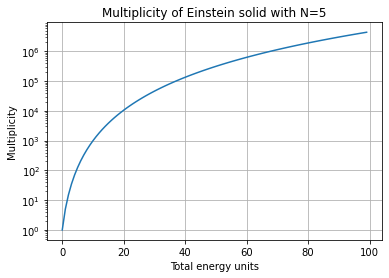

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special as scisp

N = 5

def plot_multiplicity(N, q_range=100):
    q = np.arange(0, q_range, 1)
    
    multiplicity = scisp.comb(N+q-1,q)
    label_string = "N=" + str(N)
    plt.semilogy(q, multiplicity, label=label_string)

def multiplicity_plot_show(title, x_label, y_label="Multiplicity", grid=True, legend=False):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if grid:
        plt.grid()
    if legend:
        plt.legend()
    plt.show()

plot_multiplicity(N)
title = "Multiplicity of Einstein solid with N=" + str(N)
x_label = "Total energy units"
multiplicity_plot_show(title, x_label)

(5) The following is a plot similar to above, but now for multiple values of N, from 3 to 10.



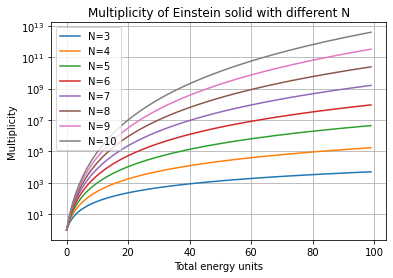

In [13]:
start_N = 3
end_N = 10
for N in range(start_N, end_N+1):
    plot_multiplicity(N)
title = "Multiplicity of Einstein solid with different N"
multiplicity_plot_show(title, x_label, legend=True)

(6) The following is a plot of the multiplicity of two solids, each with $N$=5 and interacting with
each other, so they share a total of 60 energy units. The multiplicities are calculated as a function
of the amount of energy units available to the first solid, denoted by $q_1$. 

For $q_1$=0, we have $q_2$=60, so all the energy units are part of System 2 and there is only 1 configuration
for system 1, namely that of having 0 units. As such, the total multiplicity, which is the product of the
multiplicities of the two systems, is equal to the multiplicity of System 2. For $q_1$=60, we instead
have $q_2$=0, so there is only one configuration for System 2 and many for System 1, so the multiplicity
of the total system is equal to the multiplicity of System 1.

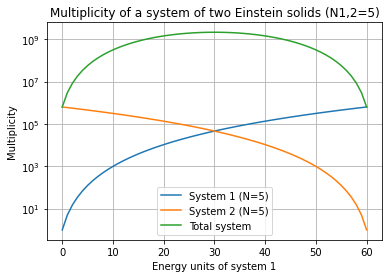

In [14]:
q_tot = 60
N1 = 5
N2 = 5

def plot_mutiplicity_2_solids(N1, N2, q_tot, calc_q_boundaries=False):
    if calc_q_boundaries:
        q1 = np.arange(0, q_tot+1, 1)
    else:
        q1 = np.arange(1, q_tot, 1)
    q2 = 60 - q1
    multiplicity1 = scisp.comb(N1+q1-1,q1)
    multiplicity2 = scisp.comb(N2+q2-1,q2)
    multiplicity_tot = multiplicity1*multiplicity2
    plt.semilogy(q1, multiplicity1, label="System 1 (N=" + str(N1) + ")")
    plt.semilogy(q1, multiplicity2, label="System 2 (N=" + str(N2) + ")")
    plt.semilogy(q1, multiplicity_tot, label="Total system")

    return multiplicity_tot, q1

plot_mutiplicity_2_solids(N1, N2, q_tot, calc_q_boundaries=True)
title = "Multiplicity of a system of two Einstein solids (N1,2=5)"
x_label = "Energy units of system 1"
multiplicity_plot_show(title, x_label, legend=True)

(7) The following includes a plot of two Einstein solids in thermal contact, with $N_1$ = 4 and $N_2$
= 8, total energy still equal to 60, showing the multiplicities of the individual systems and of the total system, 
for different $q_1$.

We approximate the derivative $\frac{d\textrm{ln}\Omega(N_1, Q_1)}{dq_1}$ by the following expression:

$$\frac{\textrm{ln}\Omega (N_1, q_1 + 1) - \textrm{ln}\Omega (N_1, q_1 - 1)}{2}$$

This is a simple difference equation approximation, as we are calculating $\frac{\Delta \textrm{ln}\Omega(N_1, Q_1)}
{\Delta q_1}$ over an interval of two $q_1$, which results in the above expression.

The second plot shows the logarithmic derivatives calculated with this approximation for both system 1,
which is with respect to $q_1$, and for system 2, which is with respect to $q_2$.

We can relate these derivatives to the reciprocal of the temperature, as this is defined as follows 
(with volume and particle number fixed):

$$\frac{1}{T} = \frac{\delta S}{\delta U}  $$

The energy units $q_1$ and $q_2$ are a measure for the internal energy $U$, while the logarithm of the multiplicity
corresponds to the entropy $S$. As such, these derivatives relate to the reciprocal of the temperature.

The absolute values of the derivatives cross at the point where the temperatures are thus equal.

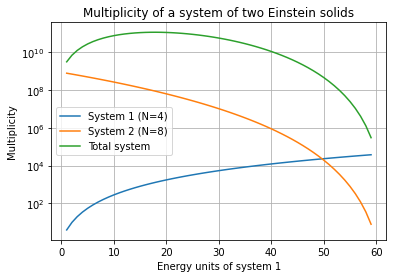

Energy q1 with maximum multiplicity: 18


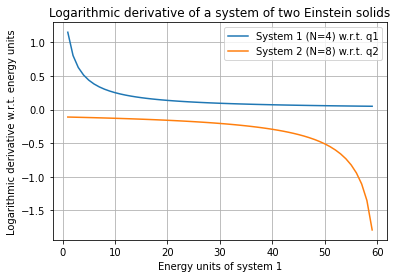

In [15]:
N1 = 4
N2 = 8
q_tot = 60
plot_mutiplicity_2_solids_c = plot_mutiplicity_2_solids(N1, N2, q_tot)
title = "Multiplicity of a system of two Einstein solids"
x_label = "Energy units of system 1"
multiplicity_plot_show(title, x_label, legend=True)
multiplicity_tot = plot_mutiplicity_2_solids_c[0]
q1 = plot_mutiplicity_2_solids_c[1]
max_mult_i = np.argmax(multiplicity_tot)
max_q1 = q1[max_mult_i]
print("Energy q1 with maximum multiplicity: "+ str(max_q1))

def plot_log_deriv_2_solids_approx(N1, N2, q_tot):
    q1 = np.arange(0, q_tot+1, 1)
    q2 = 60 - q1
    multiplicity1 = scisp.comb(N1+q1-1,q1)
    multiplicity2 = scisp.comb(N2+q2-1,q2)
    deriv1 = np.divide((np.log(multiplicity1[2:]) - np.log(multiplicity1[:-2])), 2)
    deriv2 = np.divide((np.log(multiplicity2[2:]) - np.log(multiplicity2[:-2])), 2)
    plt.plot(q1[1:-1], deriv1, label="System 1 (N=" + str(N1) + ") w.r.t. q1")
    plt.plot(q1[1:-1], deriv2, label="System 2 (N=" + str(N2) + ") w.r.t. q2")


plot_log_deriv_2_solids_approx(N1, N2, q_tot) 

title = "Logarithmic derivative of a system of two Einstein solids"
x_label = "Energy units of system 1"
y_label = "Logarithmic derivative w.r.t. energy units"
multiplicity_plot_show(title, x_label, y_label, legend=True)       

(8) Below is a plot of the scaled multiplicities (total multiplicity divided by max total multiplicity, separately
for each system) to the scaled energy units ($q_1$ divided by $q_{tot}$ of various two Einstein solid sytems
in thermal contact, with constantly doubling parameters, starting at $N_1=4$, $N_2=8$ and $q_{tot}$ = 15.

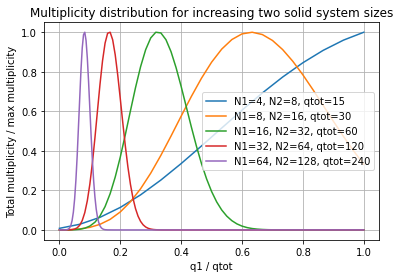

In [16]:
def plot_mutiplicity_2_solids_scaled(N1, N2, q_tot):

    q1 = np.arange(0, q_tot+1, 1)
    q2 = 60 - q1
    multiplicity1 = scisp.comb(N1+q1-1,q1)
    multiplicity2 = scisp.comb(N2+q2-1,q2)
    multiplicity_tot = multiplicity1*multiplicity2
    multiplicity_tot_scaled = multiplicity_tot/np.amax(multiplicity_tot)
    q1_scaled = q1/q_tot
    plt.plot(q1_scaled, multiplicity_tot_scaled, label="N1=" + str(N1) + ", N2=" + str(N2) + ", qtot=" + str(q_tot))

doublings = 6

for i in range(0, doublings-1):
    factor = np.power(2, i)
    N1 = 4*factor
    N2 = 8*factor
    q_tot = 15*factor
    
    plot_mutiplicity_2_solids_scaled(N1, N2, q_tot)
    
title = "Multiplicity distribution for increasing two solid system sizes"
x_label = "q1 / qtot"
y_label = "Total multiplicity / max multiplicity"
multiplicity_plot_show(title, x_label, y_label, legend=True) 


**3. Multiplicity of an Ideal gas**

(9) The gamma function ranging from 1 to 20 in half-integer steps and the factorial function from 1 to 20 in
integer steps are shown below. It can be seen that the two graphs are equivalent, which is expected as the
gamma function is meant to match the factorial.

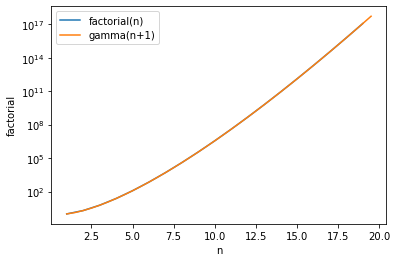

In [17]:
n_integer = np.arange(1, 20, 1)
n_halfinteger = np.arange(1, 20, 0.5)

factorial = factorial(n_integer)
gamma = gamma(n_halfinteger+1)

fig, ax = plt.subplots()
ax.semilogy(n_integer, factorial, label = 'factorial(n)')
ax.semilogy(n_halfinteger, gamma, label = 'gamma(n+1)')
plt.xlabel('n')
plt.ylabel('factorial')
plt.legend()

(10) The thermal wavelength at energy U and energy per particle u is shown below.

$\lambda = h\sqrt{\frac{3N}{4\pi m U_R}}\sqrt{\frac{U_R}{U}} = \lambda_R\sqrt{\frac{u_R}{u}}$

Where $\lambda_R$ is the thermal wavelength of helium gas at room temperature, and $u_R$ is the thermal energy
per particle.

In [18]:
#---Constants used
pi = np.pi
h = 6.62607004e-34      # Planck's constant
k_B = 1.38064852e-23    # Boltzmann's constant
T_R = 293               # Room temperature in Kelvin
amu = 1.66053904e-27    # Atomic mass unit in kg
m = 4*amu               # Atomic mass of Helium

u_R = (3/2)*k_B*T_R                 # U_R divided by N provides the given u_R (energy per particle)
lambda_R = h*np.sqrt((3)/(4*pi*m*u_R))   # Thermal wavelength at room temperature

print("The thermal wavelength at room temperature is:" + str(lambda_R))

The thermal wavelength at room temperature is:5.099600688728746e-11


(11) The following 3D plot shows the entropy per particle in an ideal gas consisting of indistinguishable monatomic
particles. It is plotted with respect to two dimensionless variables, $n \lambda^3_R$ and $u / u_R$, according to the
formula:

$$S / N = k_B \left( \ln{\left[ \frac{1}{n\lambda^3_R} \cdot \left( \frac{u}{u_R} \right)^{3/2} \right] } + \frac{5}{2} \right) $$

This formula is directly derived from the Sackur-Tetrode formula by simply replacing the variables by the ones used above.


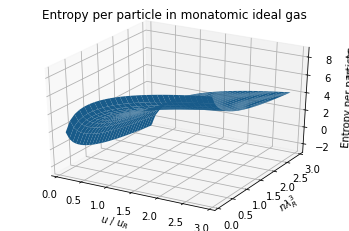

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

u_d_ur = np.arange(0.1, 3, 0.1)
n_d_l3r = np.arange(0.1, 3, 0.1)
u_d_ur_grid, n_d_l3r_grid = np.meshgrid(u_d_ur, n_d_l3r)

S_d_N = k_B * (np.log((1/n_d_l3r_grid)*np.power(u_d_ur_grid, 3/2)) + 5/2)

td_fig = plt.figure()
ax = td_fig.gca(projection='3d')
ax.set_title("Entropy per particle in monatomic ideal gas")
ax.set_xlabel("$u$ / $u_R$")
ax.set_ylabel("$n \lambda^3_R$")
ax.set_zlabel("Entropy per particle")
ax.plot_surface(u_d_ur_grid, n_d_l3r_grid, S_d_N)
plt.show()

(12) We find that the entropy is not always positive. This can likely be explained by errors
 in the approximation made when we assume an ideal gas. This assumption is only correct when
 the temperature is sufficiently high, and the total momentum P is also large.
 At low temperatures, and therefore low values of the total momentum P, the entropy approximation
 for an ideal gas is no longer correct and thus takes on negative values. This corresponds
 well with the 3D plot made as the negative values occur when $u/u_R$ is small, i.e. the
 temperature is low.